# Computer vision libraries in PyTorch

`torchvision` - Contains datasets, model architecture and image transformation for cv problems

`torchvision.dataset` - Computer vision datasets are available.

`torchvision.models` - Pre trained models are available for our own problems

`torchvision.transforms` - Transforms the image into numbers, before used with a model, common image transformations.

`torch.utils.data.Dataset` - Base dataset class for pytorch

`torch.utils.data.DataLoader` - Creates python iterable over a dataset

In [1]:
import torch
from torch import nn

In [48]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchsummary import summary

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm

# Setting device

In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Downloadin the dataset

In [8]:
train_data = datasets.FashionMNIST(root='data', train=True, transform=ToTensor(), download=True, target_transform=None)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor())

100%|█████████████████████████████████████████████████████████████████| 26421880/26421880 [00:09<00:00, 2829449.22it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 213239.08it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|███████████████████████████████████████████████████████████████████| 4422102/4422102 [00:02<00:00, 2111081.38it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



# Checking image and labels

In [9]:
image, labels = train_data[0]
image, labels

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [11]:
image.shape

torch.Size([1, 28, 28])

In [16]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

## Class names

In [17]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## Test sample with one image

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

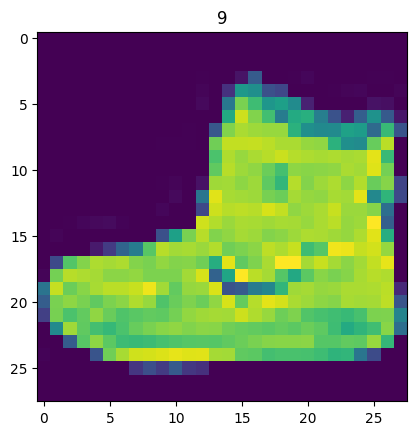

In [18]:
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)

## Test sample with grid of images

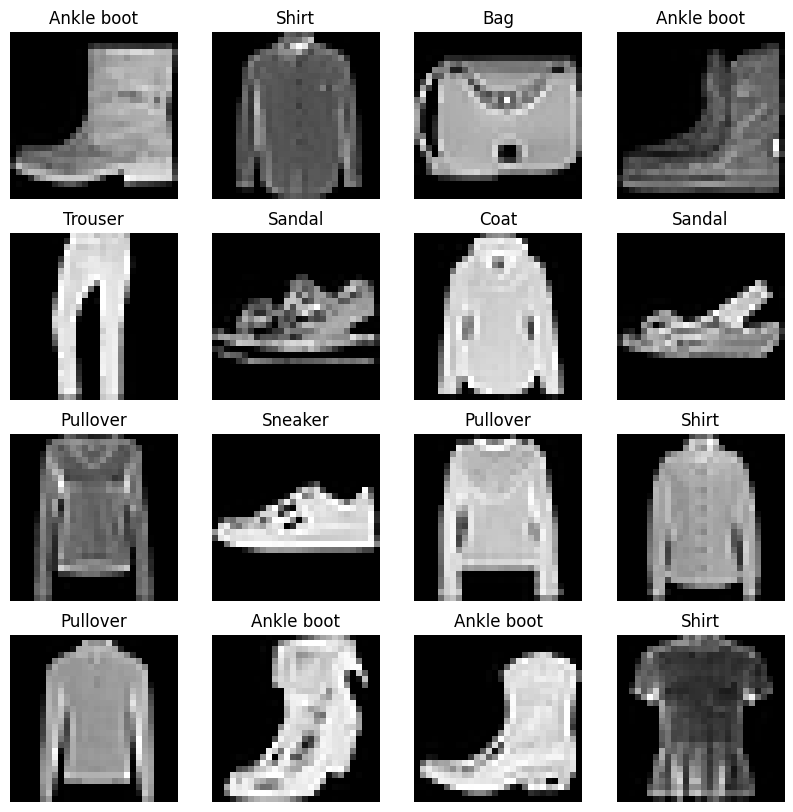

In [19]:
torch.manual_seed(42)
fig = plt.figure(figsize=(10,10))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

# Setting Dataloader

In [30]:
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

## Checking lengtha and size

In [31]:
print(f'Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [32]:
train_feature_batch, train_labels_batch = next(iter(train_dataloader))
train_feature_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## Checking with single image

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


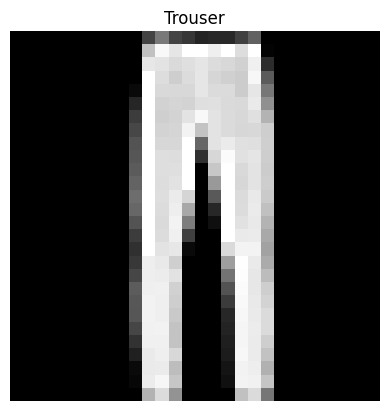

In [34]:
torch.manual_seed(44)
random_idx = torch.randint(0, len(train_feature_batch), size=[1]).item()
img, label = train_feature_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis('off')
print(f'Image size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

# Creating Class for this model

In [40]:
class FashionMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=784, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=len(class_names)),
            nn.ReLU())

    def forward(self, x):
        return self.layer_stack(x)

model = FashionMNIST().to(device)
model

FashionMNIST(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

## Creating accuracy function

In [41]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## Loss function and optimizer

In [42]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [45]:
model.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0165,  0.0234, -0.0261,  ..., -0.0112, -0.0244,  0.0327],
                      [ 0.0090, -0.0243, -0.0300,  ..., -0.0303, -0.0196,  0.0042],
                      [-0.0102, -0.0186, -0.0098,  ..., -0.0246,  0.0070, -0.0166],
                      ...,
                      [-0.0339, -0.0337,  0.0318,  ...,  0.0192,  0.0249, -0.0300],
                      [ 0.0346,  0.0184, -0.0244,  ...,  0.0085, -0.0266, -0.0250],
                      [ 0.0257,  0.0048,  0.0323,  ..., -0.0294, -0.0301,  0.0234]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([ 0.0351, -0.0263, -0.0302, -0.0305, -0.0053,  0.0172, -0.0159,  0.0270,
                      -0.0126,  0.0206], device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[ 0.2647, -0.1074,  0.1714,  0.1208,  0.1365, -0.0483,  0.3044, -0.0476,
                        0.0697, -0.2606],
                      [ 0

In [49]:
summary(model)

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Flatten: 2-1                      --
|    └─Linear: 2-2                       7,850
|    └─ReLU: 2-3                         --
|    └─Linear: 2-4                       110
|    └─ReLU: 2-5                         --
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Flatten: 2-1                      --
|    └─Linear: 2-2                       7,850
|    └─ReLU: 2-3                         --
|    └─Linear: 2-4                       110
|    └─ReLU: 2-5                         --
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0

In [64]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
    test_loss, test_acc = 0,0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}')            

In [65]:
torch.manual_seed(42)
from timeit import default_timer as timer
time_start = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f'Epochs: {epoch}\n--------')
    train_step(data_loader=train_dataloader, model=model, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn )

    test_step(data_loader=test_dataloader, model=model, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

time_end = timer()
total_time = (time_end - time_start)

C:\Users\Mohan krishnan\AppData\Local\Temp\ipykernel_7096\771840460.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm(range(epochs)):


  0%|          | 0/5 [00:00<?, ?it/s]

Epochs: 0
--------
Train loss: 0.68326 | Train accuracy: 75.05%
Test loss: 0.70424 | Test accuracy: 74.46
Epochs: 1
--------
Train loss: 0.67548 | Train accuracy: 75.19%
Test loss: 0.68706 | Test accuracy: 75.05
Epochs: 2
--------
Train loss: 0.66623 | Train accuracy: 75.51%
Test loss: 0.71268 | Test accuracy: 74.49
Epochs: 3
--------
Train loss: 0.65966 | Train accuracy: 75.68%
Test loss: 0.68693 | Test accuracy: 74.67
Epochs: 4
--------
Train loss: 0.65565 | Train accuracy: 75.71%
Test loss: 0.68697 | Test accuracy: 74.80
